# Predicting Survivors From The Titanic Distaster

## Table of Contents

1. [Introduction](#introduction)
2. [Data Exploration](#dataExploration)
    1. [Heatmap Of Correlation](#heatmapOfCorrelation)
    2. [Multivariate Study](#multivariateStudy)
3. [Data Preprocessing](#dataPreprocessing)
    1. [Handling Missing Data](#handlingMissingData)
    2. [Handling Categorical Data](#handlingCategoricalData)
    3. [Feature Engineering](#featureEngineering)
5. [Modeling](#modeling)
6. [Results](#results)

## 1. Introduction <a name="introduction"></a>

...

The goal of this project is to improve my data analysis skills and train myself on different machine learning models to classify the passenger of the Titanic whether they survived or not.

First, let's import the libraries and the datasets.

In [94]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [95]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


The dataset has 10 features which could help us predict which person survivied on the Titanic. The two features remaining being the PassengerId and the variable we want to predict.

In [97]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Five of those features are quantitative features. We can observe that the Age variable have missing values, we will handle those
later.

## 2. Data Exploration <a name="dataExploration"></a>

Our objective is to predict if a passenger survived the sinking of the Titanic.

For this, we need to identify the most important features which will help our model correctly predict the target feature.
Our target feature is the column Survived in our training dataset.

### 2.1 Heatmap Of Correlation<a name="heatmapOfCorrelation"></a>

A heatmap of correlation between all our features will give us more detail about our dataset.

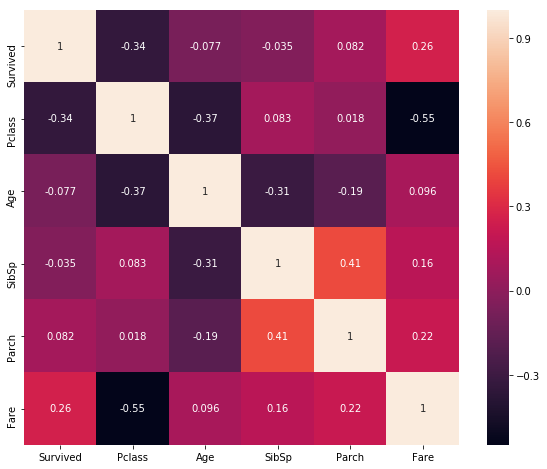

In [98]:
corr = train_df.drop("PassengerId", axis = 1).corr()
fig , ax = plt.subplots(figsize = (10 , 8))
sns.heatmap(corr, square = True, annot = True, ax = ax)

From this matrix of correlation we can see that Pclass and Fare are the most correlated with our target variable.

### 2.2 Multivariate Study<a name="multivariateStudy"></a>

Let's see what those variables can tell us about the survivability of the passengers.

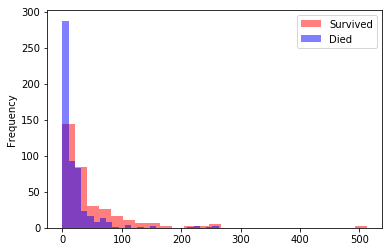

In [99]:
survived = train_df[train_df["Survived"] == 1]
died = train_df[train_df["Survived"] == 0]

survived["Fare"].plot.hist(alpha = 0.5, color = "red", bins = 25)
died["Fare"].plot.hist(alpha = 0.5, color = "blue", bins = 25)
plt.legend(["Survived", "Died"])

plt.show()

A large proportion of the passenger seems to have died when the price they paid was inferior to 20.
To confirm this assumption, we can observe a smaller part of the data.

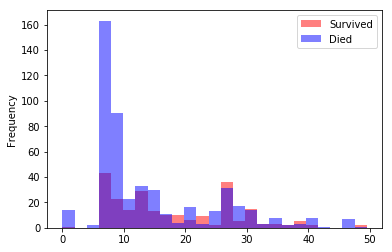

In [100]:
survived = train_df[(train_df["Survived"] == 1) & (train_df["Fare"] < 50)]
died = train_df[(train_df["Survived"] == 0) & (train_df["Fare"] < 50)]

survived["Fare"].plot.hist(alpha = 0.5, color = "red", bins = 25)
died["Fare"].plot.hist(alpha = 0.5, color = "blue", bins = 25)
plt.legend(["Survived", "Died"])

plt.show()

This validates what we said before, for a Fare of 0 to 16 the passsengers had more chance to die than survive.
This trend slowly decreases and could indicates than the class of the passengers correlates with their survivability.

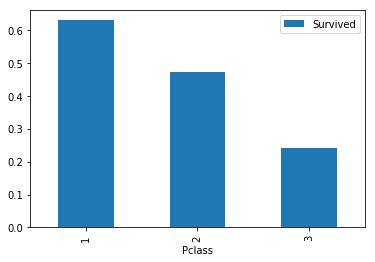

In [101]:
pivot_pclass = train_df.pivot_table(index = "Pclass", values = "Survived")
pivot_pclass.plot.bar()

plt.show()

This pivot table shows the percentage of survivors depending on the class they were travelling.
Higher classes (a lower number means a higher class) give more chance to survive.

It confirms what we observed with the Fare variable.

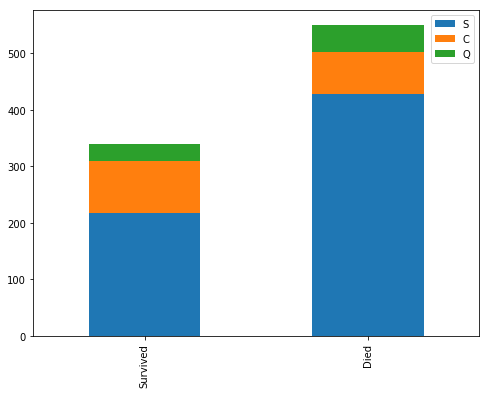

In [102]:
survived = train_df[train_df["Survived"] == 1]["Embarked"].value_counts()
died = train_df[train_df["Survived"] == 0]["Embarked"].value_counts()

embarked_df = pd.DataFrame([survived, died])
embarked_df.index = ["Survived", "Died"]
embarked_df.plot(kind = "bar", stacked = True, figsize = (8, 6))

The Embarked variable doesn't seem to show a trend.

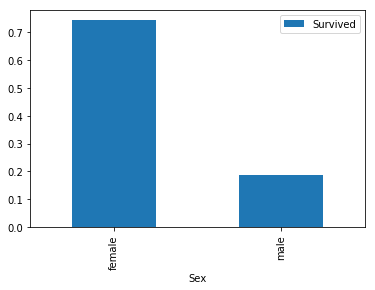

In [103]:
pivot_sex = train_df.pivot_table(index = "Sex", values = "Survived")
pivot_sex.plot.bar()

plt.show()

This pivot table shows the percentage of survivors depending on their gender.
Females are more prone to have survived.

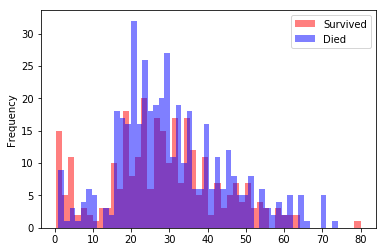

In [104]:
survived = train_df[train_df["Survived"] == 1]
died = train_df[train_df["Survived"] == 0]

survived["Age"].plot.hist(alpha = 0.5, color = "red", bins = 50)
died["Age"].plot.hist(alpha = 0.5, color = "blue", bins = 50)
plt.legend(["Survived", "Died"])

plt.show()

We can see that in some age ranges, more people survived. It is the case for the age from 0 to 10 where the red bars are higher than the blue ones.

On the contrary, from 15 to 40, we can see that a lot of the people on board of the ship didn't survive.

## 3. Data Preprocessing <a name="dataPreprocessing"></a>

### 3.1 Handling Missing Data <a name="handlingMissingData"></a>

In [105]:
temp = train_df.isnull().sum()
temp = temp[temp > 0]
train_missing_data = pd.DataFrame({"Total" : temp, "Percent" : temp / len(train_df) * 100})

temp = test_df.isnull().sum()
temp = temp[temp > 0]
test_missing_data = pd.DataFrame({"Total" : temp, "Percent" : temp / len(train_df) * 100})

print(train_missing_data)
print("-" * 26)
print(test_missing_data)

            Percent  Total
Age       19.865320    177
Cabin     77.104377    687
Embarked   0.224467      2
--------------------------
         Percent  Total
Age     9.652076     86
Fare    0.112233      1
Cabin  36.700337    327


Four variables have missing values. We have several options to handle these values.

- Cabin : a lot of the data is missing (77% on the training dataset), it would be preferable to delete this column.
- Embarked : only two values are missing. Being a categorical variable, we can fill it with the most common value, the mode.
- Fare : only one value is missing, we can fill it with the mean of the column.
- Age : this variable has nearly 20% missing values, but it is an important variable which will greatly help us build our model. We must be careful and do more analysis before filling it with any value.

#### Handling Cabin, Embarked and Fare

In [106]:
# Deleting the Cabin variable
train_df = train_df.drop("Cabin", axis = 1)
test_df = test_df.drop("Cabin", axis = 1)

# Filling the Embarked variable with the mode
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

# Filling the Fare variable with the mean
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [107]:
# Checking if everything worked
train_df.isnull().sum(), test_df.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Embarked         0
 dtype: int64, PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Ticket          0
 Fare            0
 Embarked        0
 dtype: int64)

#### Handling Age

Simply filling the missing values with the mean or the median can be bad for our model. By analyzing the age for different type of people we can found important differences.

First, we can analyze the average age for each gender.

In [108]:
print(train_df[train_df["Sex"] == "female"]["Age"].mean(), train_df[train_df["Sex"] == "male"]["Age"].mean())
print(train_df[train_df["Sex"] == "female"]["Age"].median(), train_df[train_df["Sex"] == "male"]["Age"].median())

27.915708812260537 30.72664459161148
27.0 29.0


There is not a big difference between the two gender, but we need to explore further and verify if there is any differences with the most important variables we've identified previously.

Maybe the class of a passenger is influenced by its age : an older person could affoard a more expensive ticket.

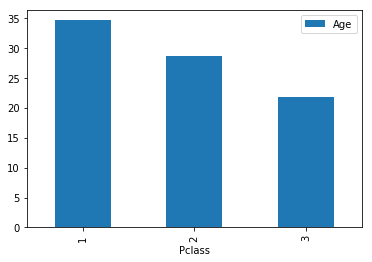

In [109]:
female_df = train_df[train_df["Sex"] == "female"]

pivot_pclass = female_df.pivot_table(index = "Pclass", values = "Age")
pivot_pclass.plot.bar()

plt.show()

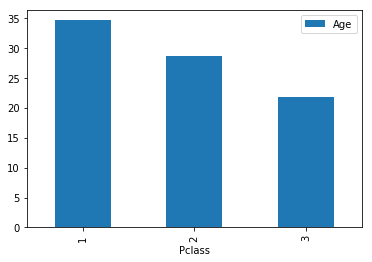

In [110]:
male_df = train_df[train_df["Sex"] == "male"]

pivot_pclass = female_df.pivot_table(index = "Pclass", values = "Age")
pivot_pclass.plot.bar()

plt.show()

Depending on the Pclass and the Sex of the passenger, the average Age varies a lot.
Here is a table comparing those results for the training dataset :

In [111]:
train_age_results = pd.DataFrame({"female" : [0., 0., 0.], "male" : [0., 0., 0.]}, index = [1, 2, 3])

for i in range(1, 4):
    res = []
    for gender in ["female", "male"]:
        train_age_results.loc[i, gender] = train_df[(train_df["Pclass"] == i) & (train_df["Sex"] == gender)]["Age"].mean()

train_age_results

,female,male
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


Using this table, we can now fill the missing values in our datasets.

In [112]:
for i in range(1, 4):
    for gender in ["female", "male"]:
        null_values = train_df[(train_df["Pclass"] == i) & (train_df["Sex"] == gender)]["Age"].isnull()
        idx = null_values[null_values == True].index
        train_df.loc[idx, "Age"] = train_age_results.loc[i, gender]

# Same thing for out test dataset
for i in range(1, 4):
    for gender in ["female", "male"]:
        null_values = test_df[(test_df["Pclass"] == i) & (test_df["Sex"] == gender)]["Age"].isnull()
        idx = null_values[null_values == True].index
        test_df.loc[idx, "Age"] = test_df[(test_df["Pclass"] == i) & (test_df["Sex"] == gender)]["Age"].mean()

In [113]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Every missing values have been taken care of.

### 3.2 Outliers <a name="outliers"></a>

By using a boxplot on the Fare variable we observe values who could be considered as outliers.

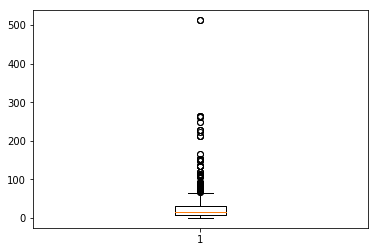

In [114]:
plt.boxplot(train_df["Fare"])
plt.show()

In [115]:
train_df[train_df["Fare"] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


There is three passengers with a Fare of 512.3292 which were all in the first class and embarked at the same location.
It doesn't seems to be the case of outliers.

### 3.3 Feature engineering <a name="featureEngineering"></a>

#### Processing Age

By creating cuts on the feature Age we will try to group people by age range so that we can detect more information on the survivability of the passengers.

First, the missing values need to be filled. We will replace the missing values by "-0.5".
Then, we'll group values into categories :
- Missing : -1 to 0
- Infant : 0 to 5
- Child : 5 to 12
- Teenager : 12 to 18
- Young Adult : 18 to 35
- Adult : 35 to 60
- Senior : 60 to 100

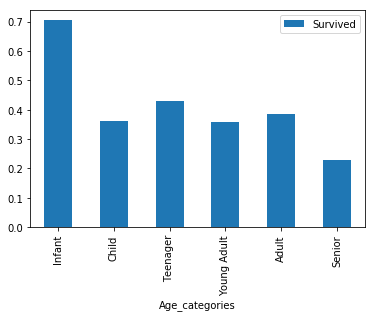

In [116]:
cut_points = [0, 5, 12, 18, 35, 60, 100]
label_names = ["Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train_df["Age_categories"] = pd.cut(train_df["Age"], cut_points, labels = label_names)
test_df["Age_categories"] = pd.cut(test_df["Age"], cut_points, labels = label_names)

pivot = train_df.pivot_table(index = "Age_categories", values = "Survived")
pivot.plot.bar()

plt.show()

This new feature help us visualize more easily the category of people who had the most chance to survive.
The "Infant" category have a 70% chance to survive whereas the "Senior" only 22%.

#### Processing Pclass, Sex, Age_categories and Embarked

Pclass is a qualitative variable but if we use it as it is our algorithm will think it is a quantitative one.
The feature must be transformed to be useful. There is three distinct values in this variable, we are going to create new columns corresponding to these values by using the function pandas.get_dummies().

The same transformation is necessary for Sex, Age_categories and Embarked.

In [117]:
for col in ["Pclass", "Sex", "Age_categories", "Embarked"]:
    dummies = pd.get_dummies(train_df[col], prefix = col)
    train_df = pd.concat([train_df, dummies], axis = 1)
    dummies = pd.get_dummies(test_df[col], prefix = col)
    test_df = pd.concat([test_df, dummies], axis = 1)

#### Processing Parch and SibSp

Combining those two variables helps us define a new feature corresponding to the size of a family.
Depending on the size of the family, their survivability can be different.

In [118]:
train_df["FamilySize"] = train_df["Parch"] + train_df["SibSp"]
test_df["FamilySize"] = test_df["Parch"] + test_df["SibSp"]

Another feature worth looking into is the Name. The Name variable contains the title of the passenger. And, as the Pclass, maybe a higher title gave a passenger more chance to survive the disaster.

Let's extract the title and create a new column with it. Then, we will create dummy variables for those titles.

In [119]:
# Regular Expression to extract the title from the name
train_df["Title"] = train_df["Name"].str.extract("([a-zA-Z]+[.])", expand=True)
test_df["Title"] = test_df["Name"].str.extract("([a-zA-Z]+[.])", expand=True)

# Creating dummy variables
combinedTitles = pd.concat([train_df["Title"], test_df["Title"]])
dummies = pd.get_dummies(combinedTitles, prefix = "Title")
train_df = pd.concat([train_df, dummies[:len(train_df)]], axis = 1)
test_df = pd.concat([test_df, dummies[len(train_df):]], axis = 1)

## 4. Modeling <a name="modeling"></a>

Now that all our features are prepared we can use it to train ou machine learning models.
The first model we are going to use is the Logistic Regression.

### 4.1 Logistic Regression <a name="logisticRegression"></a>

The training dataset is going to be split into two parts : one part to train our model and the second to test our model.
It will prevent overfitting our model and help us analyze our results.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the training dataset
features = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male", 
              "Age_categories_Infant", "Age_categories_Child", "Age_categories_Teenager",
              "Age_categories_Young Adult", "Age_categories_Adult", "Age_categories_Senior",
              "Fare", "FamilySize",
              'Title_Capt.', 'Title_Col.', 'Title_Countess.', 'Title_Don.', 'Title_Dr.',
              'Title_Jonkheer.', 'Title_Lady.', 'Title_Major.', 'Title_Master.',
              'Title_Miss.', 'Title_Mlle.', 'Title_Mme.', 'Title_Mr.', 'Title_Mrs.',
              'Title_Ms.', 'Title_Rev.', 'Title_Sir.']

# Better feature selection
features = ["Pclass_1", "Pclass_3", "Sex_female", 
              "Age_categories_Infant", "Age_categories_Child", "Age_categories_Teenager",
              "Age_categories_Young Adult", "Age_categories_Adult",
              "Fare", "FamilySize",
              'Title_Capt.', 'Title_Col.', 'Title_Countess.', 'Title_Don.', 'Title_Dr.',
              'Title_Jonkheer.', 'Title_Lady.', 'Title_Major.', 'Title_Master.',
              'Title_Miss.', 'Title_Mlle.', 'Title_Mme.', 'Title_Mr.', 'Title_Mrs.',
              'Title_Ms.', 'Title_Rev.']
X = train_df[features]
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

#### Accuracy

Now, let's see the accuracy of our model by comparing our predicted values with the real values.

In [121]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.810055865922


Our model have an accuracy of around 81%.

#### Cross Validation

To make sure it's accuracy is correct we can use cross_validation to verify our results.

In [122]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv = 10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[ 0.78651685  0.78651685  0.80898876  0.81111111  0.81111111  0.82022472
  0.83146067  0.85393258  0.86363636  0.87640449]
0.824990352968


The average accuracy of our model is 82% but it goes from 78% to nearly 87%.

#### Result Submission

In [123]:
lr.fit(X_train, y_train)

X_holdout = test_df[features]

predictions = lr.predict(X_holdout)

submission = pd.DataFrame({"PassengerId" : test_df["PassengerId"], "Survived" : predictions})
submission.to_csv("submission.csv", index=False)

The model got a score of 0.78947 on the leaderboard. It's now time to try other models to see if we can improve the score.

### 4.1 Random Forest <a name="randomForest"></a>

In [124]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the training dataset
features = ["Age", "Fare", "Sex_female", "Title_Mr.", "Pclass_3", "Title_Mrs.", "Title_Miss.", "FamilySize", "Pclass_2"]
X = train_df[features]
y = train_df["Survived"]
X_holdout = test_df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [125]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Accuracy

In [126]:
xval = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
print(np.mean(xval))

0.834342013994


#### Result Submission

In [127]:
predictions = model.predict(X_holdout).astype(int)

submission = pd.DataFrame({"PassengerId" : test_df["PassengerId"], "Survived" : predictions})
submission.to_csv("submission2.csv", index=False)

Unfortunately, this model wasn't better with the first one using Logistic Regression.